In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [5]:
data = pd.read_csv('C:/Users/Lenovo/Desktop/Loan Prediction/loan data.csv')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.shape

(614, 13)

In [9]:
pd.set_option("display.max_column",None)
pd.set_option("display.max_rows",None)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data = data.dropna()

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
data.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7676\3265604222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [28]:
data = data.replace(to_replace = "3+",value = 4)

In [29]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

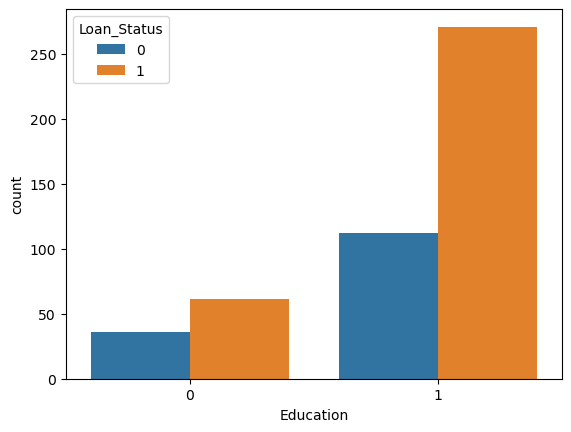

In [31]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

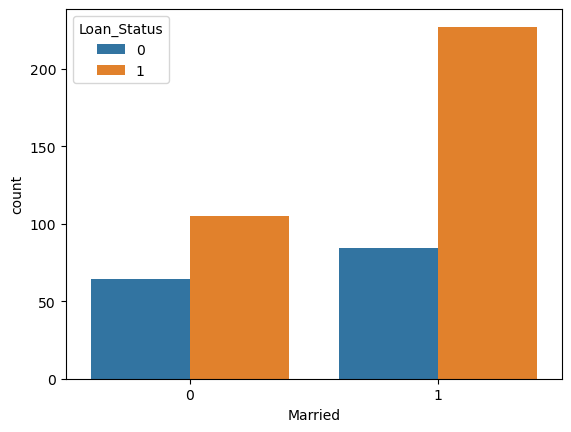

In [32]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

Seperating the data and label

In [34]:
X = data.drop(columns = ['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']

In [37]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
6         1        1          0          0              0             2333   
7         1        1          4          1              0             3036   
8         1        1          2          1              0             4006   
9         1        1          1          1              0            12841   
10        1        1          2          1              0             3200   
12        1        1          2          1              0             3073   
13        1        0          0          1              0       

In [38]:
print(Y)

1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
12     1
13     0
14     1
15     1
17     0
18     0
20     0
21     1
22     0
25     1
26     1
27     1
28     0
31     0
32     0
33     1
34     0
37     1
38     1
39     1
40     0
41     1
43     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
74     1
75     0
76     0
77     0
78     0
80     1
82     0
84     1
85     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
96     1
97     1
98     1
99     1
100    1
101    1
105    1
106    1
108    0
109    1
110    1
115    1
116    1
118    0
119    1
121    1
122    1
123    1
124    1
128    0
131    1
132    1
133    1
134    1
135    0
136    0
137    1
138    0
139    0
140    0
141    1
142    1
143    1
144    1
145    1
1

Train Test Split

In [41]:
X_train,X_test,Y_Train,Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 3)

In [43]:
print(X.shape, X_train.shape, Y_test.shape)

(480, 11) (384, 11) (96,)


Training the Model:

Support Vector Machine Model

In [47]:
classifier = svm.SVC(kernel = 'linear')

In [49]:
classifier.fit(X_train,Y_Train)

SVC(kernel='linear')

Model Evaluation

In [54]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_Train)

In [51]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7994791666666666


In [52]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [53]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7916666666666666


Model Predictive System

In [56]:
Input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)

Input_data_as_numpy_array = np.asarray(Input_data)

input_reshaping = Input_data_as_numpy_array.reshape(1,-1)

x = classifier.predict(input_reshaping)
print(x)

[0]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
